Name: Shwetha Iyer

Batch: A4

PRN: 1032211195

Q8. Perform image segmentation using Thresholding technique. Determine the threshold automatically using Global Thresholding algorithm.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

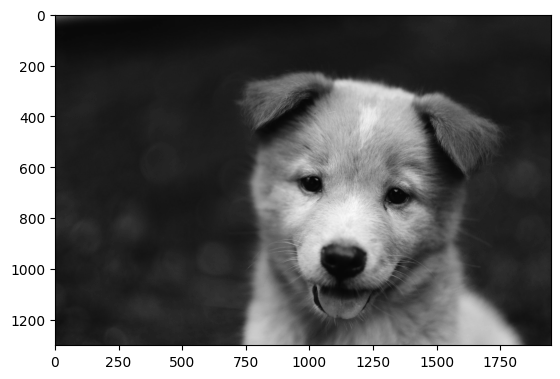

In [ ]:
img = cv2.imread('/content/00-puppy.jpg',0)
plt.imshow(img, cmap='gray')

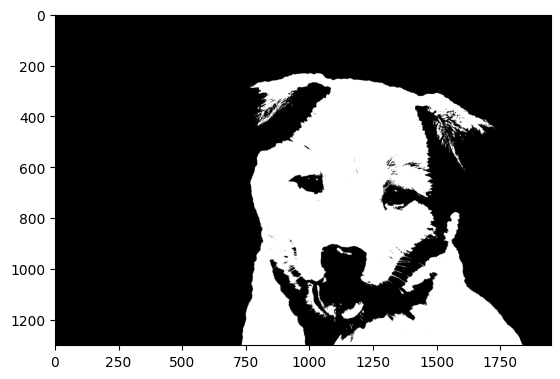

In [ ]:
threshold = 75
result = np.zeros([img.shape[0], img.shape[1]])
result[img > threshold] = 255
plt.imshow(result, cmap='gray')

# ***Global Thresholding Algorithm***

1. Select an initial estimate of the threshold T.

2. Use T to form two groups G1 and G2: G1 consists of all pixels with intensity values > T, and G2 consists of all pixels with intensity values ≤ T.

3. Compute the average intensity values u1 and u2 for groups G1 and G2.

4. Compute the new value of the threshold T as T = (u1 + u2)/2

5. Repeat steps 2 through 4 until the difference in the subsequent value of T is smaller than a pre-defined value δ.

6. Segment the image as g(x,y) = 1 if f(x,y) > T and g(x,y) = 0 if f(x,y) ≤ T.  

In [ ]:
def global_threshold(img, T=127, diff=1):
    while True:
        grp1 = img > T
        grp2 = img <= T
        u1 = np.mean(img[grp1])
        u2 = np.mean(img[grp2])

        T_new = int((u1 + u2) / 2)
        if abs(T_new - T) < diff:
            break
        T = T_new
    return T

threshold = global_threshold(img)
print("Global threshold found = ", threshold)

Global threshold found =  78


Text(0.5, 1.0, 'Histogram')

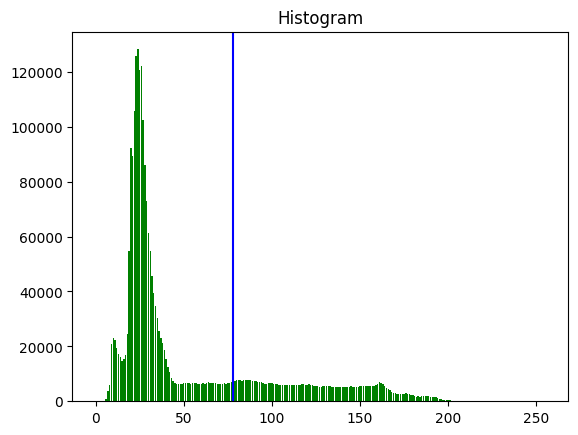

In [ ]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.bar(np.arange(len(hist)), hist.ravel(), color='green')
plt.axvline(threshold, color='blue', linestyle='-')
plt.title("Histogram")

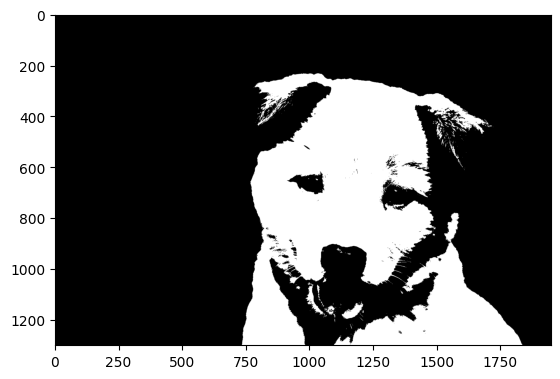

In [ ]:
result = np.zeros([img.shape[0], img.shape[1]])
result[img > threshold] = 255
plt.imshow(result, cmap='gray')

# ***Otsu's Thresholding Algorithm***

In [ ]:
def otsu_threshold(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()  #Normalized histogram
    max = 0
    opt_thres = 0

    for t in range(256):
        #probabilities of foreground and background
        w0 = np.sum(hist[:t])
        w1 = np.sum(hist[t:])
        #means of foreground and background
        u0 = np.sum(np.arange(t) * hist[:t]) / (w0 + 1e-10)
        u1 = np.sum(np.arange(t, 256) * hist[t:]) / (w1 + 1e-10)
        #between-class variance
        sigma_b2 = w0 * w1 * ((u0 - u1) ** 2)
        if sigma_b2 > max:
            max = sigma_b2
            opt_thres = t

    return opt_thres

Otsu's Threshold: 78


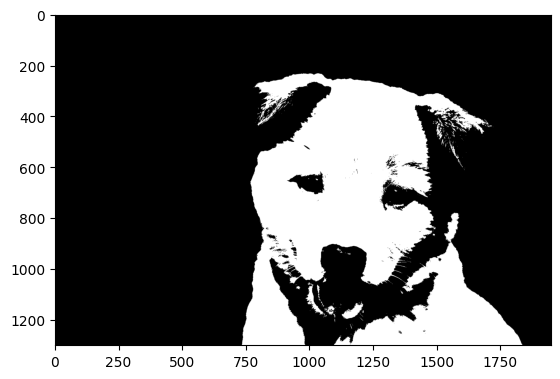

In [ ]:
threshold = otsu_threshold(img)
print("Otsu's Threshold:",threshold)
result = np.zeros([img.shape[0], img.shape[1]])
result[img > threshold] = 255
plt.imshow(result, cmap='gray')

# ***Conclusion:***
Thus, we have implemented thresholding function to perform binary segmentation of an image.

We have foud optimum threshold value using Global Thresholding Algorithm and Otsu's Algorithm.